# Project II - Titanic Classification 

#### 06/25/22
#### Ilyas Saoud
## Introduction
In this project, I downloaded titanic data from Kaggle with the name and information of 1000+ passengers who either died or survived the titanic fall https://www.kaggle.com/competitions/titanic. The data was split into 'train' and 'test' datasets for classification. This time, I want to dig in a bit deeper into how neural networks function. Instead of using Pytorch or TensorFlow libraries, I decided to write and understand the code from scratch with the help of the book 'Machine learning by Sebastian Raschka & Vahid Mirjalili'. It's a great book for machine learning. I hope after this project to learn more about the small variables and calculations that can help me achieve higher accuarcy.

## Let's import some libraries!
* seaborn: Used for data visualization
* numpy: Used for Arrays and matrices
* pandas: Used for Data Frames
* opendatasets: Used to download dataset from Kaggle (hidden)

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od

## The data
Here I pulled the datasets from my files. 
* The 'train' is the dataset used to train our model. 
* The 'test' dataset is used to test the model with new unseen data to test the accuarcy of our model.

In [2]:
train = df = pd.read_csv('titanic/train.csv')
test = df = pd.read_csv('titanic/test.csv')
acc_test = pd.read_csv('titanic/gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## The description of each column

* Survival: Survival              |	0 = No, 1 = Yes
* Pclass: Ticket class          | 	1 = 1st, 2 = 2nd, 3 = 3rd
* Sex: Sex                   	
* Age: Age in years          	
* Sibsp: # of siblings / spouses aboard the Titanic 	
* Parch: # of parents / children aboard the Titanic 	
* Ticket: Ticket number         	
* Fare: Passenger fare        
* Cabin: Cabin number        
* Embarked: Port of Embarkation   | C = Cherbourg, Q = Queenstown, S = Southampton

## Boxplot!
Here we have two boxplots. Value 0 representing 'No' and 1 represent 'Yes'. From looking at the boxplot, it is clear that although children and women were priotized, the data shows that the age spread was similar in both cases.

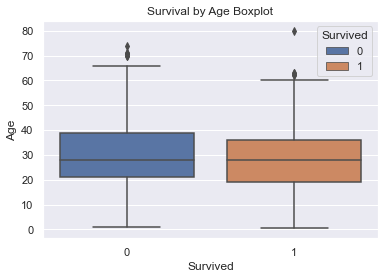

In [3]:
sns.set_theme(style="darkgrid")
sns.boxplot(data=train, x="Survived", y="Age",
                        hue="Survived", dodge = False).set(title='Survival by Age Boxplot');
sns.set(rc={'figure.figsize':(13,6)});

## Value Counts

* Number of males and females in our training dataset. 

In [4]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* Number of passengers of died and survived. Value 0 representing death.

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Number of passengers on each class. 1 being the top class.

In [22]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Displot
Here we have four bar graphs. On the left column, the bargraphs represent the number of passengers who died per class, grouped by sex. While the right column, the bargraphs represent the number of passengers who survived per class. Looking at the graphs, we can see that female passengers and first class passengers were more likely to survive. 

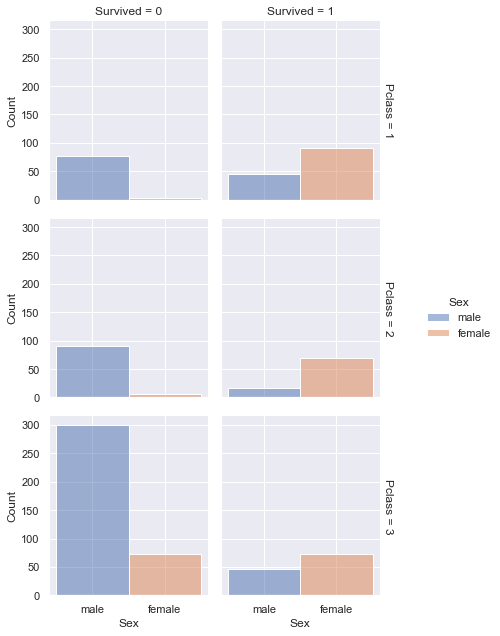

In [7]:
sns.set_theme(style="darkgrid")
disp = sns.displot(
    train, x="Sex", col="Survived", row="Pclass",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True),
    stat = "count",hue = "Sex"
);

## The training model
* Instead of using a perceptron, I decided to use Adaptive Linear Neuron (Adaline) as our model with the main difference being the way we update our weights which is used using a linear activation function instead of of a unit step function. The final predcition still uses the step function. 
* This Adaline model uses Stochastic gradient descent in case of a large dataset. 
Here are some simple explanation of some of the functions:
* the __init__ function is used to call take in variables when calling our model: AdalineSGD(eta = 0.001, n_iter = 20) as an example. 
* eta represents the learning rate. this rate is multiplied when updating the weights 
* n_iter represents the number of epochs or 'runs'
* fit() is used to update the weights and biases. Inside you can find the cost_ list that stores the error of each run. 
* _initialize_weights is used to create the first array with random weights that will be used on each training input then will be updated.
* _update_weights() updates the weights 
* net_input() preforms matrix multiplication using dot product 
* predict() will take in new inputs and outputs the prediction value.

In [8]:
class AdalineSGD:
    def __init__(self,eta = 0.01, n_iter = 10, random_state = None,
                shuffle = True):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_initializaed = False
        self.shuffle = shuffle
        self.random_state = random_state
    def fit(self,X,y):
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for _ in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi,target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self,X,y):
        r = self.rgen.permutation(len(y))
        return(X[r], y[r])
    
    def _initialize_weights(self,m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc= 0.0, scale = 0.01,size = 1+m)
        self.w_initialized = True
    def _update_weights(self,xi,target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1,0)

## Filtering our dataset
Here, both our train and test datasets were cutdown to fewer columns that will be useful for our training model. 

In [9]:
test = test[['PassengerId','Sex','Pclass',
                'SibSp','Parch']]
train = train[['Survived','Sex','Pclass',
                'SibSp','Parch']]

## String to Integer
Here we are changing the values of the 'Sex' column from Str to Int. Each value here must be an integer because our neural network does not recognize words. The values must be numbers that can be used for our calculations. Images and texts are both transfered to numbers for classification and more. 

In [10]:
def Changes(df):
    df.loc[(df.Sex =='female'), 'Sex'] = 0
    df.loc[(df.Sex =='male'), 'Sex'] = 1
    df = df.fillna(1)
    return df
train = Changes(train)
test = Changes(test)
train

,Survived,Sex,Pclass,SibSp,Parch
0,0,1,3,1,0
1,1,0,1,1,0
2,1,0,3,0,0
3,1,0,1,1,0
4,0,1,3,0,0
...,...,...,...,...,...
886,0,1,2,0,0
887,1,0,1,0,0
888,0,0,3,1,2
889,1,1,1,0,0


## Dataframe to Arrays!
Here we are transforming our dataframe to Arrays so that they can be for matrices multiplication. the y here represents the true value of our output that will be used to calculate the sum of errors. 

In [27]:
X = train.iloc[0:891, [1,2,3,4]].values
y = train.iloc[0:891,0].values
X.shape

(891, 4)

## Sum-Squared-error Vs Epochs plot
* The code below graphs the Sum-Squared_error during each Epoch. An epoch just represents the loop and weight update using fit() and it plots the Sum-Squared-error for that run. 
* ada is calling our model 'AdalineSGD' to .fit() our training dataset.

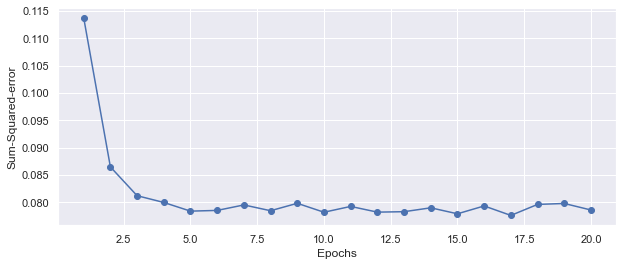

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))

ada = AdalineSGD(n_iter = 20, eta = 0.01).fit(X,y)
ax.plot(range(1,len(ada.cost_)+1),
          ada.cost_,marker='o')
ax.set_xlabel('Epochs');
ax.set_ylabel('Sum-Squared-error');


## Testing Array
Here, we are once again transforming the dataset to an array but this time for testing! We used ada.predict to use our model to test the new inputs, below are the results.

In [13]:
X_test = test.iloc[0:417, [1,2,3,4]].values
ada.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

## Comparing True values with Predicted values 
Below we added the predicted values to the 'acc_test' table.
These are the true output values and are compared to the predicted output values from the code above.

In [15]:
def pred2(Sex,Pclass,SibSp,Parch):
    pred_val = ada.predict([Sex,Pclass,SibSp,Parch])
    return(pred_val)
    

In [16]:
acc_test['Predicted'] = [1 if pred2(i['Sex'],i['Pclass'],i['SibSp'],i['Parch']) == 1 else 
                           0 if pred2(i['Sex'],i['Pclass'],i['SibSp'],i['Parch']) == 0 else 
                           -1 for index,i in test.iterrows()]

In [29]:
acc_test.head()

,PassengerId,Survived,Predicted
0,892,0,0
1,893,1,1
2,894,0,1
3,895,0,0
4,896,1,1


## Finally, calculating our accuracy.
Here we are creating a for loop to calculate the accuracy

In [18]:
correct = 0
for i,o in zip(acc_test[['Survived']].values,acc_test[['Predicted']].values):
    if i == o:
        correct +=1

In [19]:
accuracy = correct / len(test) * 100
"This Model is " + str(round(accuracy,2)) +  " % Accurate"

'This Model is 71.29 % Accurate'